# Analisis de Datos de Incendios

## Enunciado

Debes realizar un proceso completo de depuración y análisis de datos, realizando los siguientes pasos:
- Carga el dataframe adjunto y realiza, un análisis inicial del mismo (describe()..., describe().T, quantiles... etc)
- Observa como están los datos, hay vacíos, columnas no necesarias (indicadas en el fichero de descripción de campos)
- Convierte los datos de mes y día semana a castellano, añade una columna llamada GRAVEDAD (con los valores ALTA, MEDIA y BAJA, según la hectáreas quemadas (ALTA > 700 ha, MEDIA entre 400 y 700, BAJA < 400).
- Procede a realizar un análisis según los gráficos que veas necesarios, para poder ir sacando conclusiones e información de interés.
- Todo el proceso debe quedar reflejado en un documento jupyter con los comentarios y cabeceras en markdowm, las ejecuciones de limpieza y manipulación. así como los gráficos generados comentando lo que observamos.

## Cargar el dataframe

Para ello necesitamos importar ```Pandas```.

In [2]:
import pandas as pd

Ahora debemos <b>descomprimir</b> y <b>extraer</b> el dataframe. Para descomprimir debemos utilizar la libreria ```zipfile```.

In [3]:
import zipfile

zf = zipfile.ZipFile('DATAFRAME INCENDIOS.zip')
df = pd.read_csv(zf.open('INCENDIOS/INCENDIOS.csv'))
df.head()

,X,Y,MES,DIA_SEMANA,FFMC,DMC,DC,ISI,TEMPERATURA,HUMEDAD_RELATIVA,VIENTO,LLUVIA,AREA_QUEMADA
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


## Analisis del dataframe

Realizamos un ```describe()``` para poder ver cosas como el <em>count</em>, <em>media</em>, <em>desviacion tipica estandar</em>, <em>minimo</em>, <em>cuartiles</em> y <em>maximo</em>.

In [4]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,TEMPERATURA,HUMEDAD_RELATIVA,VIENTO,LLUVIA,AREA_QUEMADA
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
X,517.0,4.669246,2.313778,1.0,3.0,4.00,7.00,9.00
Y,517.0,4.299807,1.229900,2.0,4.0,4.00,5.00,9.00
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
TEMPERATURA,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
HUMEDAD_RELATIVA,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
VIENTO,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
LLUVIA,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40


Observamos el <em>porcentaje</em> de vacios.

In [6]:
df.isnull().sum()/len(df)*100

X                   0.0
Y                   0.0
MES                 0.0
DIA_SEMANA          0.0
FFMC                0.0
DMC                 0.0
DC                  0.0
ISI                 0.0
TEMPERATURA         0.0
HUMEDAD_RELATIVA    0.0
VIENTO              0.0
LLUVIA              0.0
AREA_QUEMADA        0.0
dtype: float64

No falta ningun valor en el dataframe.

Quitamos las columnas que no necesitamos:
    - X
    - Y
    - FFMC
    - DMC
    - DC
    - ISI

In [7]:
df = df.drop('X', axis = 1)
df = df.drop('Y', axis = 1)
df = df.drop('FFMC', axis = 1)
df = df.drop('DMC', axis = 1)
df = df.drop('DC', axis = 1)
df = df.drop('ISI', axis = 1)
df.head()

,MES,DIA_SEMANA,TEMPERATURA,HUMEDAD_RELATIVA,VIENTO,LLUVIA,AREA_QUEMADA
0,mar,fri,8.2,51,6.7,0.0,0.0
1,oct,tue,18.0,33,0.9,0.0,0.0
2,oct,sat,14.6,33,1.3,0.0,0.0
3,mar,fri,8.3,97,4.0,0.2,0.0
4,mar,sun,11.4,99,1.8,0.0,0.0


## Traducir los datos del mes y dia al castellano

Para traducir usaremos el metodo pandas.DataFrame.replace().<br>
Usaremos un <em>diccionario</em> para cambiar los valores del mes.

In [8]:
df = df.replace({"jan":"ene","apr":"abr","aug":"ago","dec":"dic"})
df['MES']

0      mar
1      oct
2      oct
3      mar
4      mar
      ... 
512    ago
513    ago
514    ago
515    ago
516    nov
Name: MES, Length: 517, dtype: object

Hacemos lo mismo para cambiar los dias de la semana.

In [9]:
df = df.replace({"mon":"lun","tue":"mar","wed":"mie","thu":"jue","fri":"vie","sat":"sab","sun":"dom"})
df['DIA_SEMANA']

0      vie
1      mar
2      sab
3      vie
4      dom
      ... 
512    dom
513    dom
514    dom
515    sab
516    mar
Name: DIA_SEMANA, Length: 517, dtype: object

## Crear una nueva columna basada en una condicion

Para lograrlo usaremos esta funcion:<br>
```df['tier'] = np.select(conditions, values)```

Pero antes debemos importar la libreria ```numpy```

In [10]:
import numpy as np

Creamos la lista de <em>condiciones</em>:

(ALTA > 700 ha, MEDIA entre 400 y 700, BAJA < 400)

In [11]:
conditions = [
    (df['AREA_QUEMADA'] > 700),
    (df['AREA_QUEMADA'] <= 700) & (df['AREA_QUEMADA'] > 400),
    (df['AREA_QUEMADA'] <= 400)
]

Creamos la lista de <em>valores<em> que asignaremos en esos casos:

In [12]:
values = ['ALTA', 'MEDIA', 'BAJA']

Creamos una nueva columna <em>GRAVEDAD</em> con los valores de nuestras listas como argumentos.

In [13]:
df['GRAVEDAD'] = np.select(conditions, values)
df.head()

,MES,DIA_SEMANA,TEMPERATURA,HUMEDAD_RELATIVA,VIENTO,LLUVIA,AREA_QUEMADA,GRAVEDAD
0,mar,vie,8.2,51,6.7,0.0,0.0,BAJA
1,oct,mar,18.0,33,0.9,0.0,0.0,BAJA
2,oct,sab,14.6,33,1.3,0.0,0.0,BAJA
3,mar,vie,8.3,97,4.0,0.2,0.0,BAJA
4,mar,dom,11.4,99,1.8,0.0,0.0,BAJA


## Análisis de los datos obtenidos por medio de graficas

Diccionario de variables:
   3. Mes - JAN (Enero) a DEC (Diciembre)
   4. DIA_SEMANA - MON (Lunes) a SUN (Domingo)
   9. TEMPERATURA - De 2.2 a 33.30 grados celsius
   10. HUMEDAD RELATIVA - Porcentaje %: 15.0 a 100
   11. VIENTO - Velocidad en km/h: 0.40 a 9.40 
   12. LLUVIA - Volumen mm/m2 : 0.0 a 6.4 
   13. AREA QUEMADA - En hectareas: 0.00 a 1090.84

<b>Análisis univariante</b>

El análisis univariante es la forma más sencilla de analizar datos. Se trata simplemente de considerar cada variable por separado, sumarizarla y analizar su distribución de valores.

Veremos la distribucion de sus valores en un ```histograma```

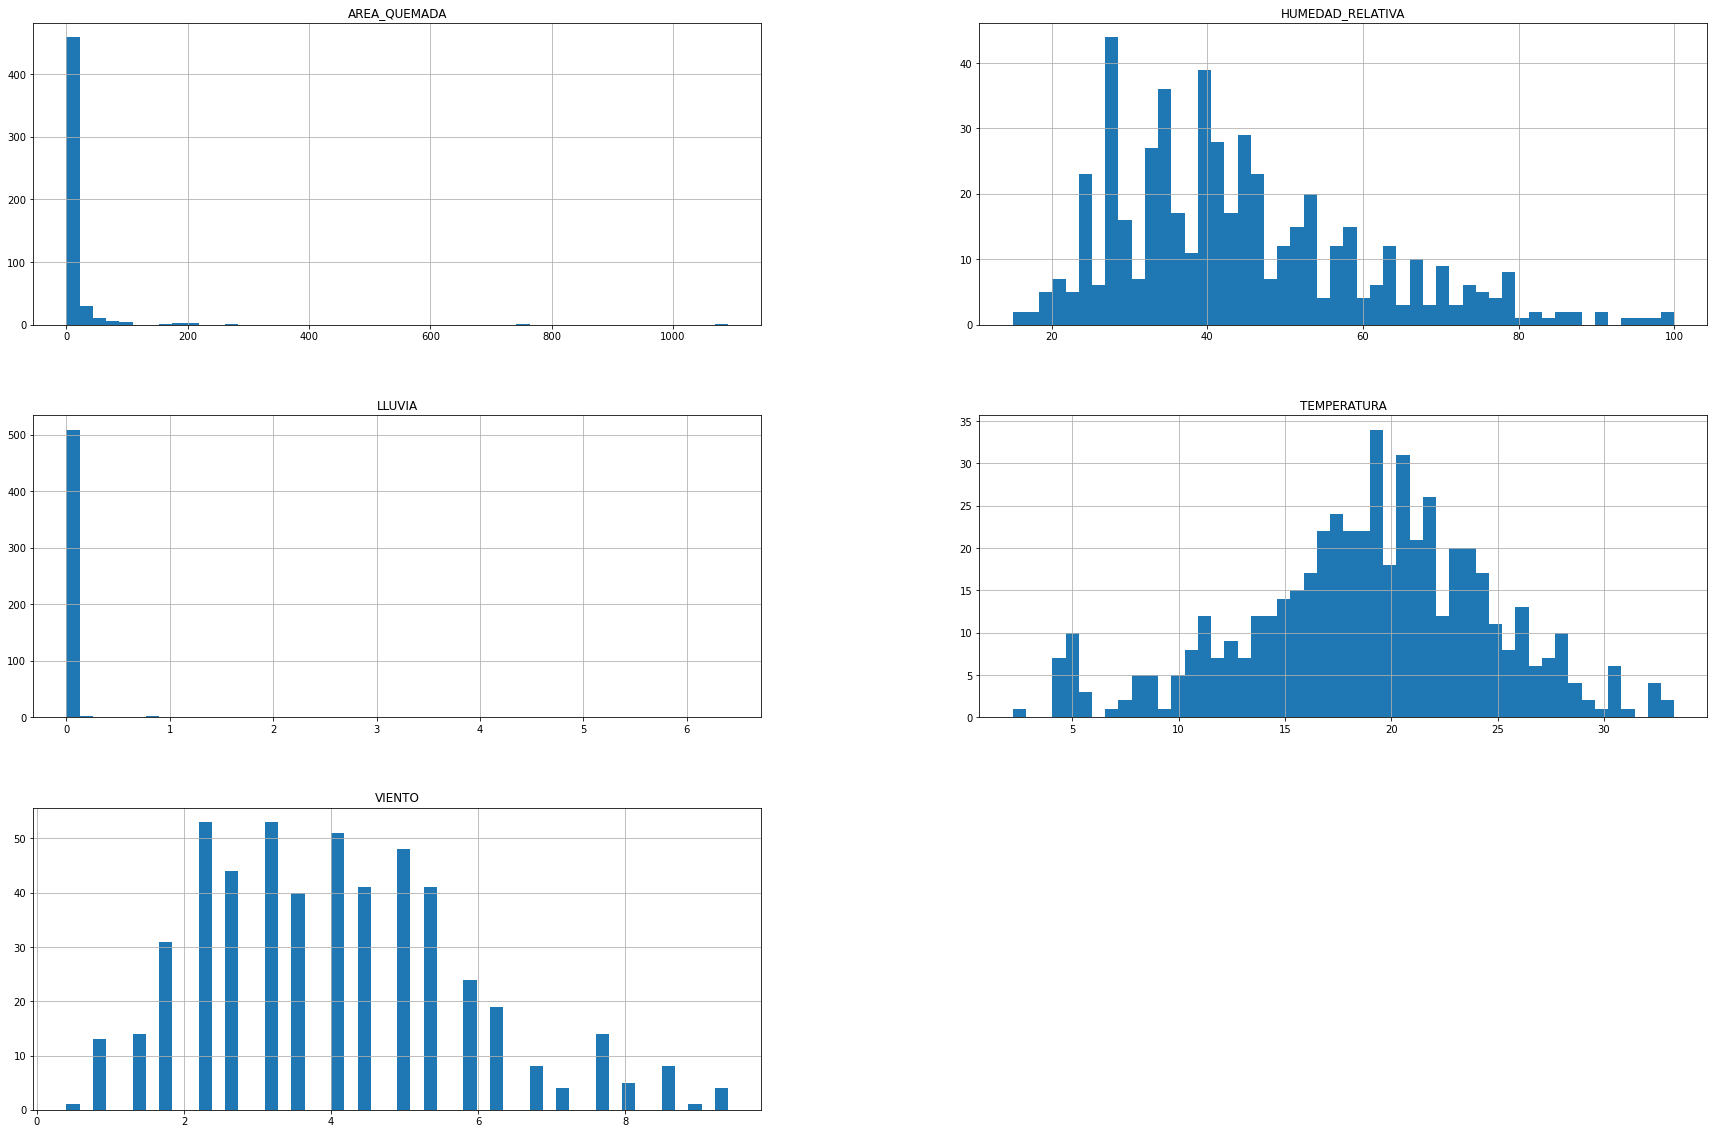

In [14]:
df.hist(bins=50, figsize=(30,20));

<b>Variables numéricas</b>

La función ```describe()``` nos permite hacer una descriptiva rápida de las variables de tipo numérico. En concreto, nos muestra la media, la desviación estándard, el mínimo, el máximo y los cuartiles de las variables.

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TEMPERATURA,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
HUMEDAD_RELATIVA,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
VIENTO,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
LLUVIA,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40
AREA_QUEMADA,517.0,12.847292,63.655818,0.0,0.0,0.52,6.57,1090.84


Vamos a prestar mas atencion a la columna de <em>AREA_QUEMADA</em>.

In [16]:
df['AREA_QUEMADA'].describe()

count     517.000000
mean       12.847292
std        63.655818
min         0.000000
25%         0.000000
50%         0.520000
75%         6.570000
max      1090.840000
Name: AREA_QUEMADA, dtype: float64

El mayor area quemada es de 1090 hectareas y la media es relativamente baja.

<b>Test de normalidad</b>

Vamos a observar como se comportan las temperaturas a lo largo del tiempo

Con la función ```distplot``` de la librería de visualización ```Seaborn``` podemos comparar la distribución de nuestra variable con la normal.

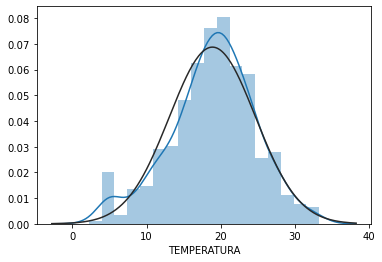

In [17]:
import seaborn as sns
from scipy.stats import norm

sns.distplot(df['TEMPERATURA'], fit = norm)

Aqui podemos observar que la temperatura sigue la normal lo cual es logico ya que concuerda con los meses del año.

La función ```skew``` calcula el coeficiente de asimetría.
Si es positivo y mayor que uno, los valores de la distribución són más densos hacia la izquierda del gráfico. En una distribución normal, el coeficiente de asimetría sería cercano a cero.

In [18]:
df['TEMPERATURA'].skew()

-0.331172237347285

En nuestro caso es casi cero y negativo lo que indica qu esta cerca del centro tirando para la derecha.

La función ```kurtosis``` nos da una idea de la relación del pico central con los extremos de la campana de la distribución. Si es cercano a 1, el valor será coherente con la normalidad de la variable.

In [19]:
df['TEMPERATURA'].kurtosis()

0.1361655076587991

En nuestro caso esta muy cerca.

<b>Variables categóricas</b>

El otro tipo de variables que tenemos son las variables categóricas. Analizaremos la variable que identifica la velocidad del viento en km/h.


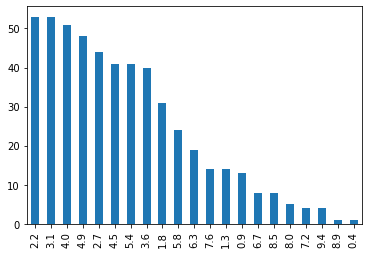

In [20]:
df['VIENTO'].value_counts().plot(kind='bar')

Aqui vemos cuales son las velocidades mas comunes.

<b>Análisis bivariante</b>

Para analizar un conjunto de datos debemos tener en cuenta más de una variable a la vez. El análisis bivariante permite identificar las relaciones entre dos variables, y hasta ver de qué forma una puede predecir la otra.

En este caso podemos ver cuál es la relación entre la <em>TEMPERATURA</em> y la <em>HUMEDAD_RELATIVA</em> con un ```scatter plot``` o diagrama de puntos.


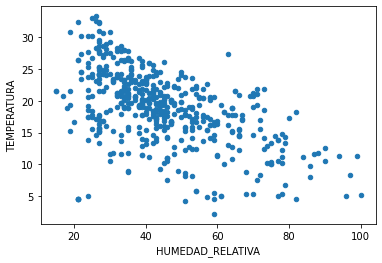

In [21]:
data = pd.concat([df['TEMPERATURA'], df['HUMEDAD_RELATIVA']], axis=1)
data.plot.scatter(x='HUMEDAD_RELATIVA', y='TEMPERATURA')

Aquí podemos observar como la humedad relativa se incrementa a medida que disminuye la temperatura.

También podemos ver que a unos 20 grados es la zona con mayores registros en humedad lo que quiere decir que es la temperatura mas estable.

Podemos visualizar la relación tambien con un ```boxplot``` o diagrama de cajas.

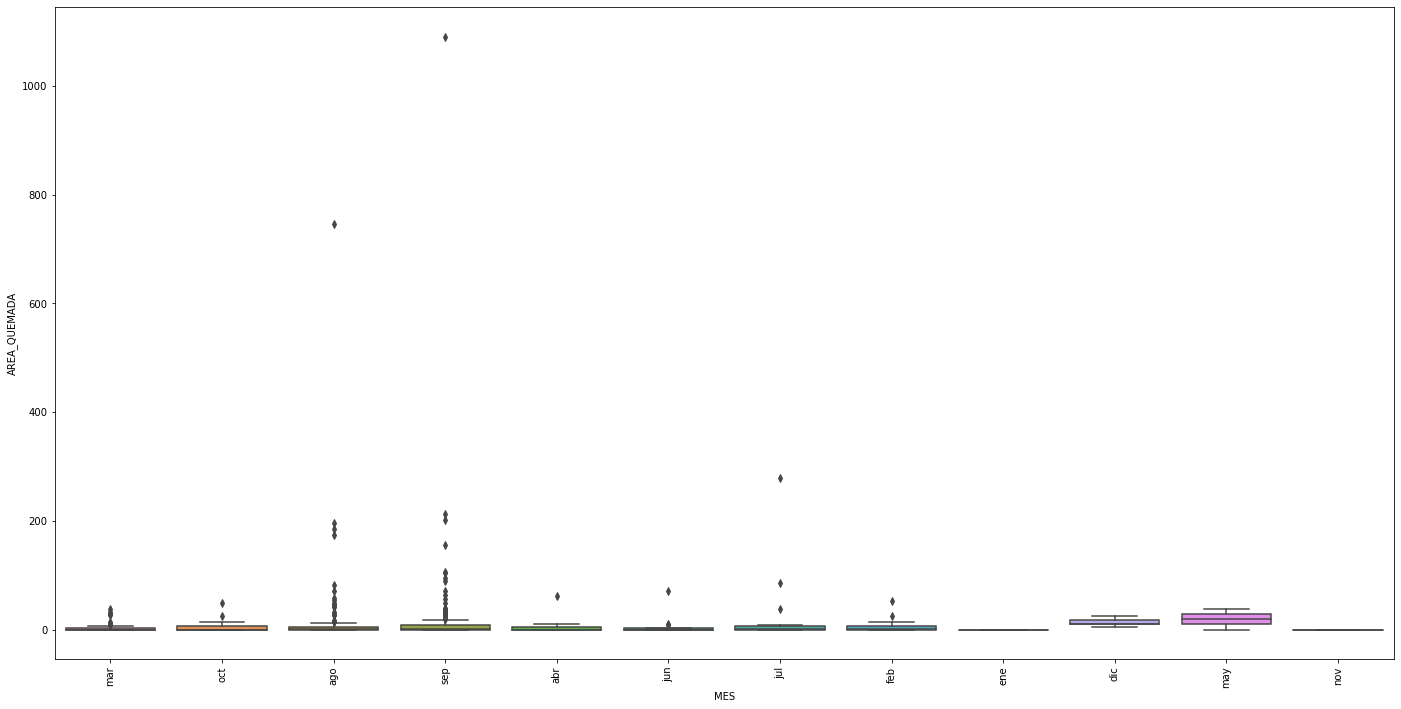

In [29]:
import matplotlib.pyplot as plt

data = pd.concat([df['AREA_QUEMADA'], df['MES']], axis=1)
f, ax = plt.subplots(figsize=(24, 12))
fig = sns.boxplot(x='MES', y="AREA_QUEMADA", data=data)
plt.xticks(rotation=90);

Aqui vemos que los meses con mas abundancia de incendios son <em>Julio</em>, <em>Agosto</em> y <em>Septiembre</em>.

Los mayores incendios son en <em>Agosto</em> y <em>Septiembre</em>.

Con esto podriamos contratar a mas gente en esos meses para prevenir los incendios y prescindir de ellos en <em>Enero</em> y <em>Noviembre</em>.

<b>Análisis multivariante</b>

Finalmente, nos interesará ver qué conjuntos de variables estan relacionadas entre sí. Para ello, usaremos técnicas estadísticas de análisis multivariante.

Una de las herramientas más útiles es calcular la matriz de correlación entre las variables. Con la función ```heatmap``` podemos visualizar de manera sencilla aquellas variables más correlacionadas, que corresponden a una intensidad mayor de color.


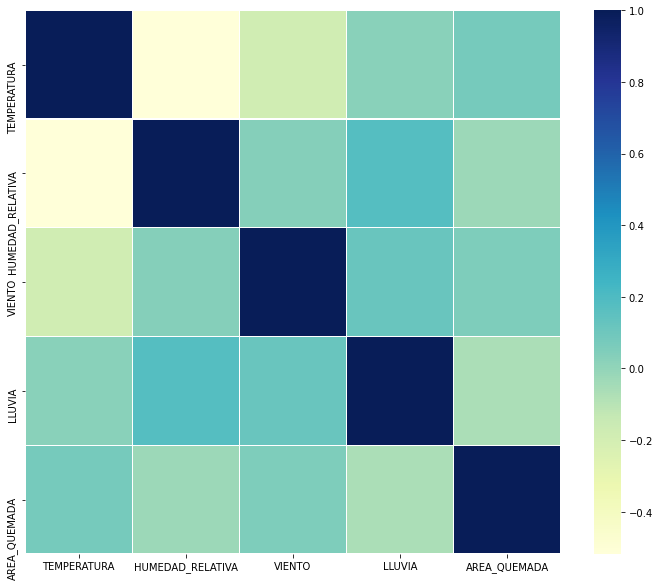

In [53]:
corrmat = df.corr(method='spearman')
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corrmat, ax=ax, cmap="YlGnBu", linewidths=0.1)

El ```clustermap``` nos permite ir un paso más allá y agrupar las variables que tienen más relación entre ellas, a partir de un algoritmo de clustering a partir de la información de la correlación. Esto nos servirá eventualmente, para evitar escojer datos muy correlacionados que nos puedan perjudicar en el momento de aplicar un modelo.

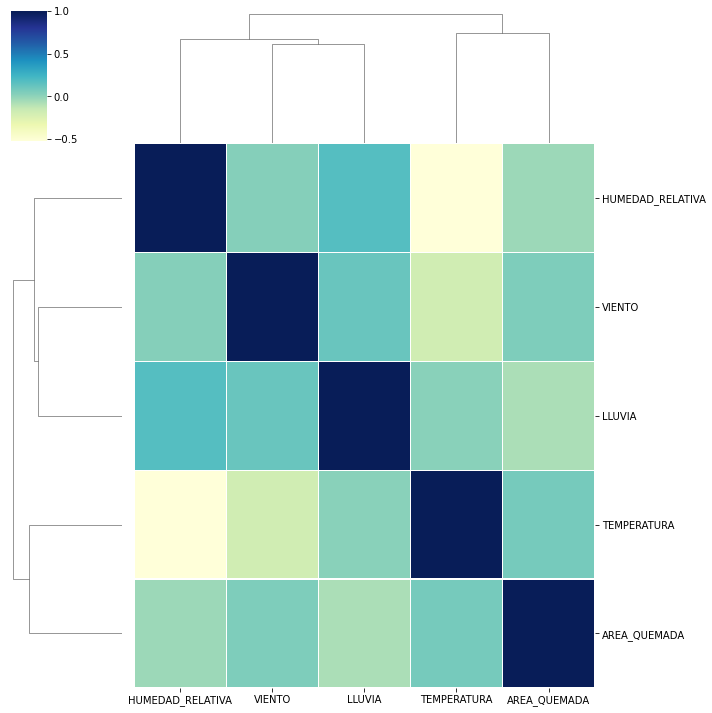

In [55]:
corrmat = df.corr(method='spearman')
cg = sns.clustermap(corrmat, cmap="YlGnBu", linewidths=0.1);
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
cg

En este caso vemos que las variables no estan muy correlacionadas.

Se puede ver que la <em>HUMEDAD_RELATIVA</em> y la <em>LLUVIA</em> estan mas correlacionados lo cual tiene bastante sentido